In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import chardet


In [3]:
with open("baskets.csv", "rb") as f:
    result = chardet.detect(f.read())

df = pd.read_csv("baskets.csv", header=None, encoding=result["encoding"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
1,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna(how="all", axis=0)
df = df.dropna(how="all", axis=1)

transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
print(len(transactions))
print(transactions[:5])

7501
[['креветки', 'миндаль', 'авокадо', 'овощная смесь', 'зеленый виноград', 'цельнозерновая мука', 'батат', 'творог', 'энергетический напиток', 'томатный сок', 'низкокалорийный йогурт', 'зеленый чай', 'мед', 'салат', 'минеральная вода', 'лосось', 'ягодный сок', 'замороженный смузи', 'шпинат', 'оливковое масло'], ['гамбургер', 'фрикадельки', 'яйца'], ['чатни'], ['индейка', 'авокадо'], ['минеральная вода', 'молоко', 'энергетический батончик', 'рис', 'зеленый чай']]


In [7]:
te = TransactionEncoder()
te_transformed = te.fit(transactions).transform(transactions)
df_transformed = pd.DataFrame(te_transformed, columns=te.columns_)
df_transformed

,авокадо,аксессуары,баклажаны,батат,батончик без глютена,бекон,белое вино,белый сыр,блинчики,ветчина,...,чили,шампанское,шампунь,шоколад,шпинат,энергетический батончик,энергетический напиток,эскалоп,ягодный сок,яйца
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
support_threshold = 0.002
confidence_thresholds = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

support_itemsets_df = pd.DataFrame()
rules_df = pd.DataFrame()
execution_times = []
rules_count = []

for confidence_threshold in confidence_thresholds:
    print(f"\nПорог достоверности: {confidence_threshold}")

    frequent_itemsets = apriori(df_transformed, min_support=support_threshold, use_colnames=True)
    
    frequent_itemsets["support_threshold"] = support_threshold
    frequent_itemsets["confidence_threshold"] = confidence_threshold
    frequent_itemsets["itemset_size"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))

    frequent_itemsets = frequent_itemsets.sort_values(by=["itemset_size", "support"], ascending=[True, False])

    support_itemsets_df = pd.concat([support_itemsets_df, frequent_itemsets], ignore_index=True)

    start_time = time.perf_counter()
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)
    end_time = time.perf_counter()
    print(f"Время выполнения association_rules: {end_time - start_time} секунд")

    execution_times.append(end_time - start_time)
    rules_subset = rules[["antecedents", "consequents", "support", "confidence"]].copy()
    rules_subset["confidence_threshold"] = confidence_threshold

    rules_subset = rules_subset.sort_values(by=["support"], ascending=False)

    rules_df = pd.concat([rules_df, rules_subset], ignore_index=True)

    rules_count.append(len(rules_subset))


Порог достоверности: 0.7
Время выполнения association_rules: 0.018848300001991447 секунд

Порог достоверности: 0.75
Время выполнения association_rules: 0.020133099998929538 секунд

Порог достоверности: 0.8
Время выполнения association_rules: 0.01935879999655299 секунд

Порог достоверности: 0.85
Время выполнения association_rules: 0.01820429999497719 секунд

Порог достоверности: 0.9


C:\Users\mazgu\AppData\Local\Temp\ipykernel_14880\1264167210.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rules_df = pd.concat([rules_df, rules_subset], ignore_index=True)


Время выполнения association_rules: 0.018121499997505452 секунд

Порог достоверности: 0.95


C:\Users\mazgu\AppData\Local\Temp\ipykernel_14880\1264167210.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rules_df = pd.concat([rules_df, rules_subset], ignore_index=True)


Время выполнения association_rules: 0.01844130000245059 секунд


C:\Users\mazgu\AppData\Local\Temp\ipykernel_14880\1264167210.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rules_df = pd.concat([rules_df, rules_subset], ignore_index=True)


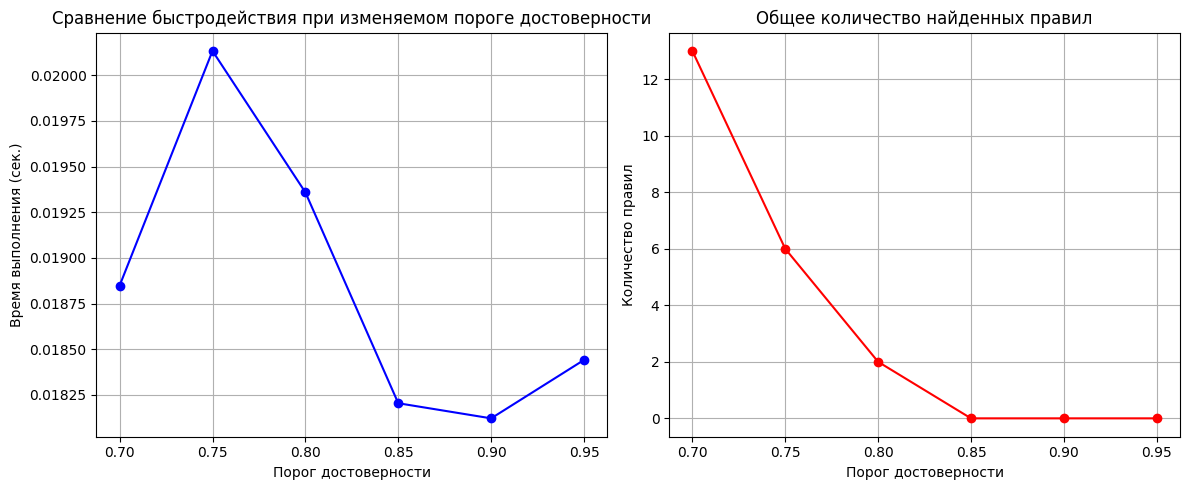

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(confidence_thresholds, execution_times, marker="o", linestyle="-", color="b")
plt.title("Сравнение быстродействия при изменяемом пороге достоверности")
plt.xlabel("Порог достоверности")
plt.ylabel("Время выполнения (сек.)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(confidence_thresholds, rules_count, marker="o", linestyle="-", color="r")
plt.title("Общее количество найденных правил")
plt.xlabel("Порог достоверности")
plt.ylabel("Количество правил")
plt.grid(True)

plt.tight_layout()
plt.show()